## BioPsyKit

In [8]:
import biopsykit as bp

from biopsykit.signals import ecg

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Mit diesem Python Package kann man biopsychologische Daten analysieren:
- Datenverarbeitungspipeline für Biosignale (EKG, EEG, ...)
- Methoden zur Analyse von Speichelproben (Corisol, Amylase)
- Implementierung von verschiedenen Fragebögen
- Montreal Imaging Stress Task (MIST)
- Trier Social Stress Test (TSST)
- ...

### EKG Datenverarbeitung:

Daten laden:

In [9]:
ecg_data, sampling_rate = bp.example_data.get_ecg_example()
ep = ecg.EcgProcessor(data=ecg_data, sampling_rate=sampling_rate)

R-Peak-Erkennung und eine Ausreißerkorrektur:

In [11]:
ep.ecg_process()

  0%|          | 0/1 [00:00<?, ?it/s]

Herzrate:

In [12]:
hr_data = ep.heart_rate['Data']
hr_data.head()

,Heart_Rate
time,
2019-10-23 12:31:51.582031+02:00,83.883495
2019-10-23 12:31:53.093750+02:00,88.275862
2019-10-23 12:31:53.773437+02:00,81.702128
2019-10-23 12:31:54.507812+02:00,79.585492
2019-10-23 12:31:55.261718+02:00,79.175258


Daten plotten:

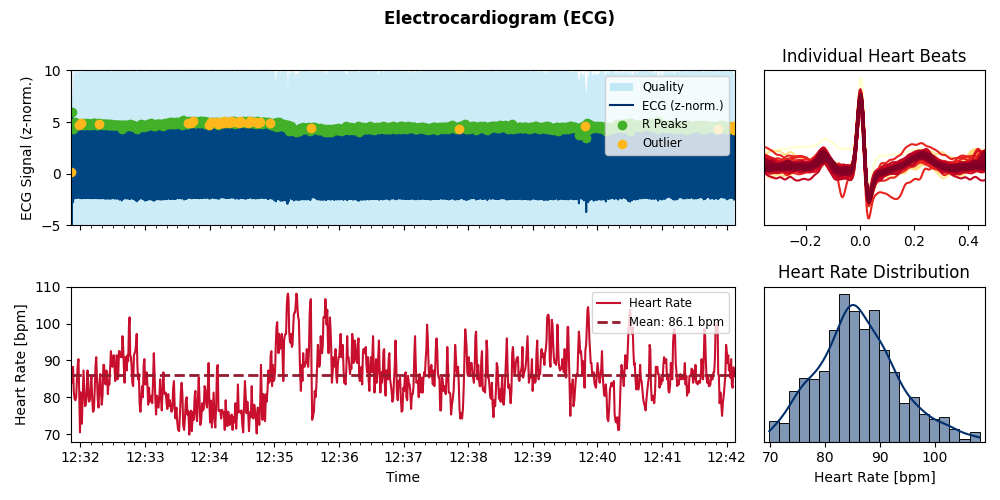

In [13]:
fig, axs = ecg.plotting.ecg_plot(ep, key='Data', figsize=(10,5))

## Herzratenvariablität

In [14]:
ep.hrv_process(ep, 'Data', index='Vp01', index_name="subject_id")

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
subject_id,,,,,,,,,,,,,,,,,,,,,
Vp01,702.266876,59.242368,40.538539,45.273643,16.463248,55.552245,NaN,NaN,36.06283,36.08348,...,1.46064,5.859088,1.072725,1.226666,1.344431,1.887899,1.773796,1.786412,3.944204,0.804974


Übersicht plotten:

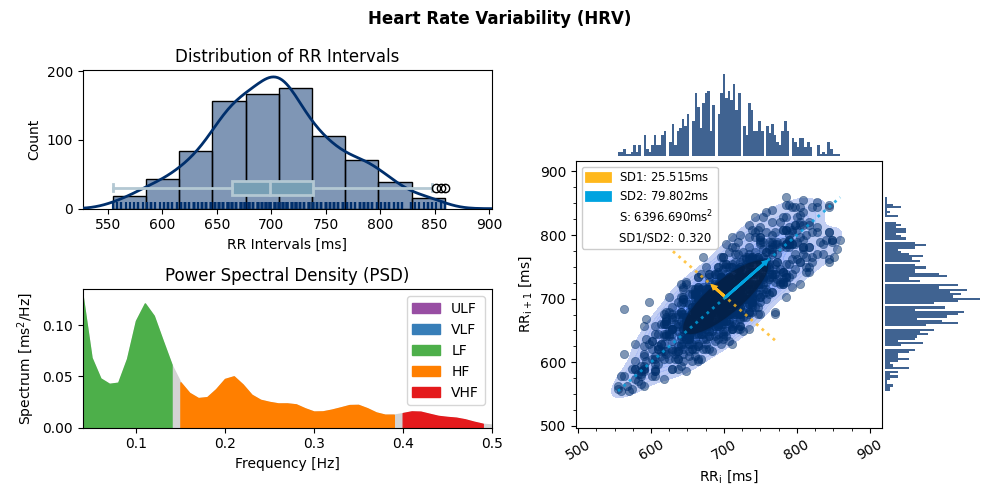

In [15]:
fig, axs = ecg.plotting.hrv_plot(ep, 'Data', figsize=(10,5))